# Rotation talk figures

## Imports

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load signal and filter output from file

In [2]:
python_echo_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/result/output_python_echo.h5'
with h5py.File(python_echo_fpath, 'r') as f:
    fp_python_echo = f['filter_preds'][:]
    rt_python_echo = f['rt_times_us'][:]
    
python_lms_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/result/output_python_lms_new.h5'
with h5py.File(python_lms_fpath, 'r') as f:
    fp_python_lms = f['filter_preds'][:]
    rt_python_lms = f['rt_times_us'][:]
    
rust_echo_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/result/output_rust_echo.h5'
with h5py.File(rust_echo_fpath, 'r') as f:
    fp_rust_echo = f['filter_preds'][:]
    rt_rust_echo = f['rt_times_us'][:]
    
rust_lms_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/result/output_rust_lms.h5'
with h5py.File(rust_lms_fpath, 'r') as f:
    fp_rust_lms = f['filter_preds'][:]
    rt_rust_lms = f['rt_times_us'][:]

## Latency distribution


In [3]:
print(f'Median (Python echo): {np.median(rt_python_echo):.2f} us')
print(f'Median (Rust echo): {np.median(rt_rust_echo):.2f} us')
print(f'Median (Python LMS): {np.median(rt_python_lms):.2f} us')
print(f'Median (Rust LMS): {np.median(rt_rust_lms):.2f} us')

Median (Python echo): 47.00 us
Median (Rust echo): 634.64 us
Median (Python LMS): 9949.00 us
Median (Rust LMS): 467334.10 us


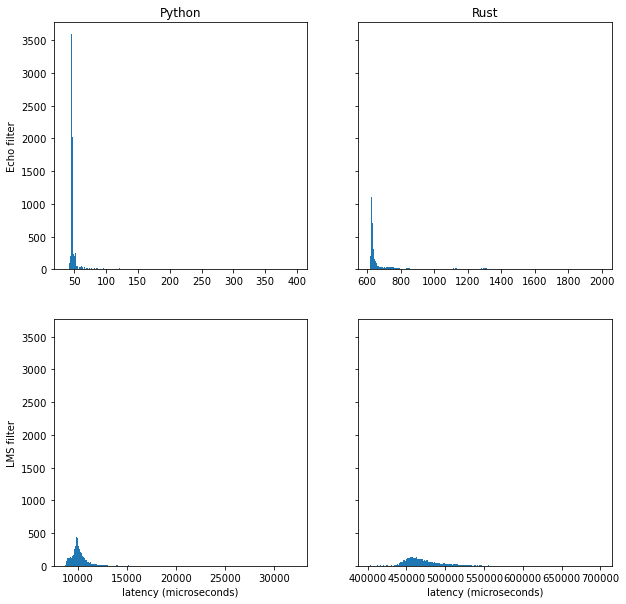

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

ax[0, 0].set_title('Python');
ax[0, 0].set(ylabel='Echo filter')
ax[0, 0].hist(rt_python_echo[rt_python_echo < 400], bins=500)

ax[0, 1].set_title('Rust');
ax[0, 1].hist(rt_rust_echo[rt_rust_echo < 2000], bins=500)

ax[1, 0].set(xlabel='latency (microseconds)', ylabel='LMS filter')
ax[1, 0].hist(rt_python_lms[rt_python_lms < 40000], bins=500)

ax[1, 1].set(xlabel='latency (microseconds)')
ax[1, 1].hist(rt_rust_lms[rt_rust_lms < 700000], bins=500)

plt.savefig('latency_compare.png')